In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("HR Employee Attrition.csv", na_values='?')

In [34]:
df.shape

(1470, 35)

In [35]:
df = df.dropna()

In [36]:
df.shape

(1470, 35)

In [37]:
lb = LabelEncoder()
df['EducationField'] = lb.fit_transform(df['EducationField'])
df['BusinessTravel'] = lb.fit_transform(df['BusinessTravel'])
df['Attrition'] = lb.fit_transform(df['Attrition'])
df['Department'] = lb.fit_transform(df['Department'])
df['Gender'] = lb.fit_transform(df['Gender'])
df['JobRole'] = lb.fit_transform(df['JobRole'])
df['MaritalStatus'] = lb.fit_transform(df['MaritalStatus'])
df['OverTime'] = lb.fit_transform(df['OverTime'])
df['Over18'] = lb.fit_transform(df['Over18'])



In [38]:
d = df.drop(['Attrition'], axis=1)

In [39]:
d.shape

(1470, 34)

In [40]:
Y = df['Attrition']
X = d

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 34) (441, 34) (1029,) (441,)


In [42]:
scaler_features = StandardScaler()
scaler_target = StandardScaler()

In [43]:
X_train = scaler_features.fit_transform(X_train.values)
y_train = scaler_target.fit_transform(y_train.values[:,None])
X_test = scaler_features.transform(X_test.values)
y_test = scaler_target.transform(y_test.values[:,None])

In [44]:
pca1 = PCA(n_components=2,random_state=43)
data_pca1 = pca1.fit_transform(X_train)

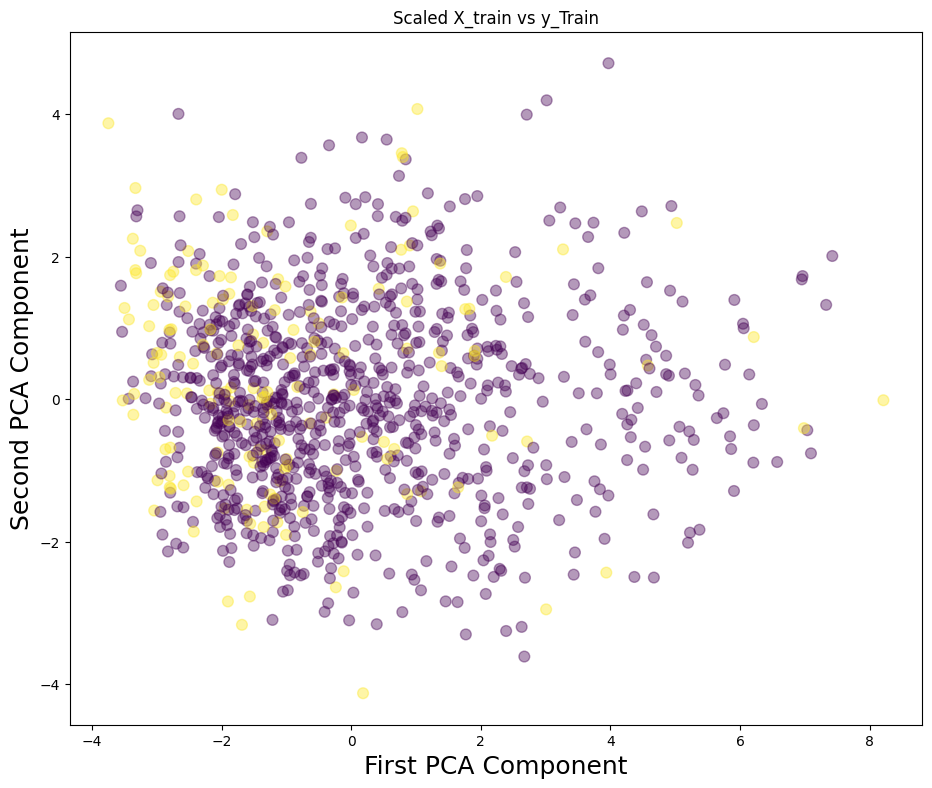

In [45]:
fig1, axs1 = plt.subplots(1,1,figsize=(11,9))
axs1.scatter(data_pca1[:,0],data_pca1[:,1],c=y_train,alpha=0.4,s=60)
axs1.set_xlabel("First PCA Component",fontsize=18)
axs1.set_ylabel("Second PCA Component",fontsize=18)
axs1.title.set_text('Scaled X_train vs y_Train')

In [46]:
evr1 = pca1.explained_variance_ratio_
total_evr1 = evr1.sum() * 100
print("Explained variation per principal component: {}".format(evr1))
print("Total percentage of variance captured by the first 2 components of PCA: {}".format(total_evr1))
print("Strength of each PCA components: ",pca1.singular_values_)

Explained variation per principal component: [0.15280603 0.06109037]
Total percentage of variance captured by the first 2 components of PCA: 21.389640004096343
Strength of each PCA components:  [69.81661278 44.14432971]


In [47]:
pca2 = PCA(n_components=2,random_state=43)
data_pca2 = pca2.fit_transform(X_test)

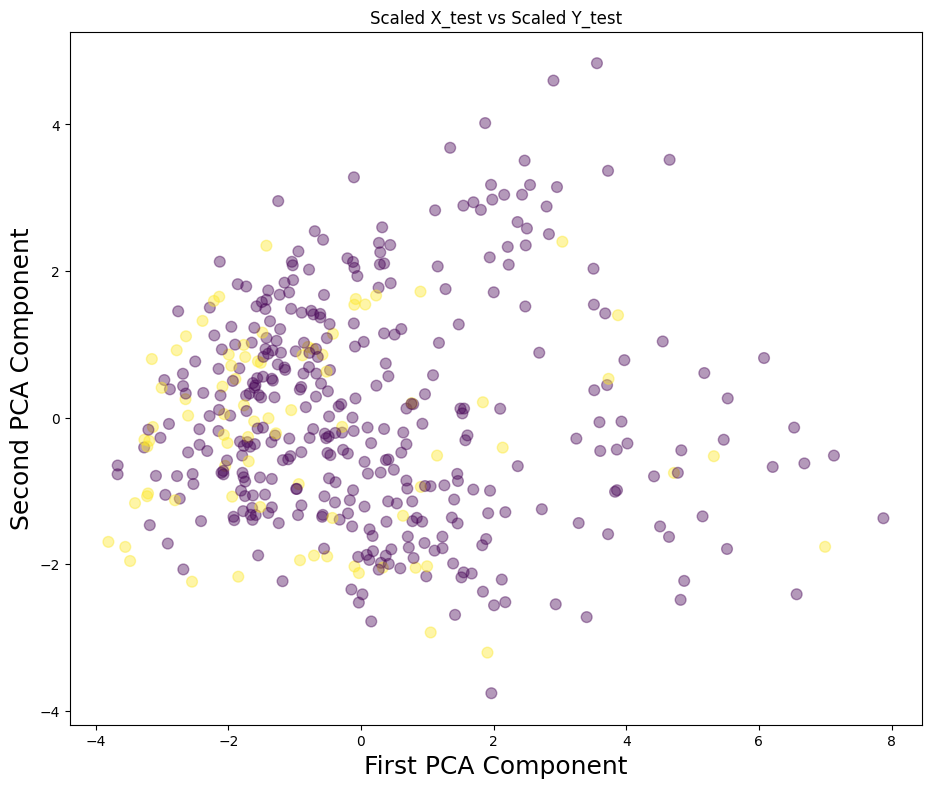

In [48]:
fig2, axs2 = plt.subplots(1,1,figsize=(11,9))
axs2.scatter(data_pca2[:,0],data_pca2[:,1],c=y_test,alpha=0.4,s=60)
axs2.set_xlabel("First PCA Component",fontsize=18)
axs2.set_ylabel("Second PCA Component",fontsize=18)
axs2.title.set_text('Scaled X_test vs Scaled Y_test')

In [49]:
evr2 = pca2.explained_variance_ratio_
total_evr2 = evr2.sum() * 100
print("Explained variation per principal component: {}".format(evr2))
print("Total percentage of variance captured by the first 2 components of PCA: {}".format(total_evr2))
print("Strength of each PCA components: ",pca2.singular_values_)

Explained variation per principal component: [0.15326101 0.06921531]
Total percentage of variance captured by the first 2 components of PCA: 22.247631963821927
Strength of each PCA components:  [45.81581653 30.78936233]


In [50]:
pca3 = PCA(n_components=2,random_state=43)
data_pca3 = pca3.fit_transform(X)

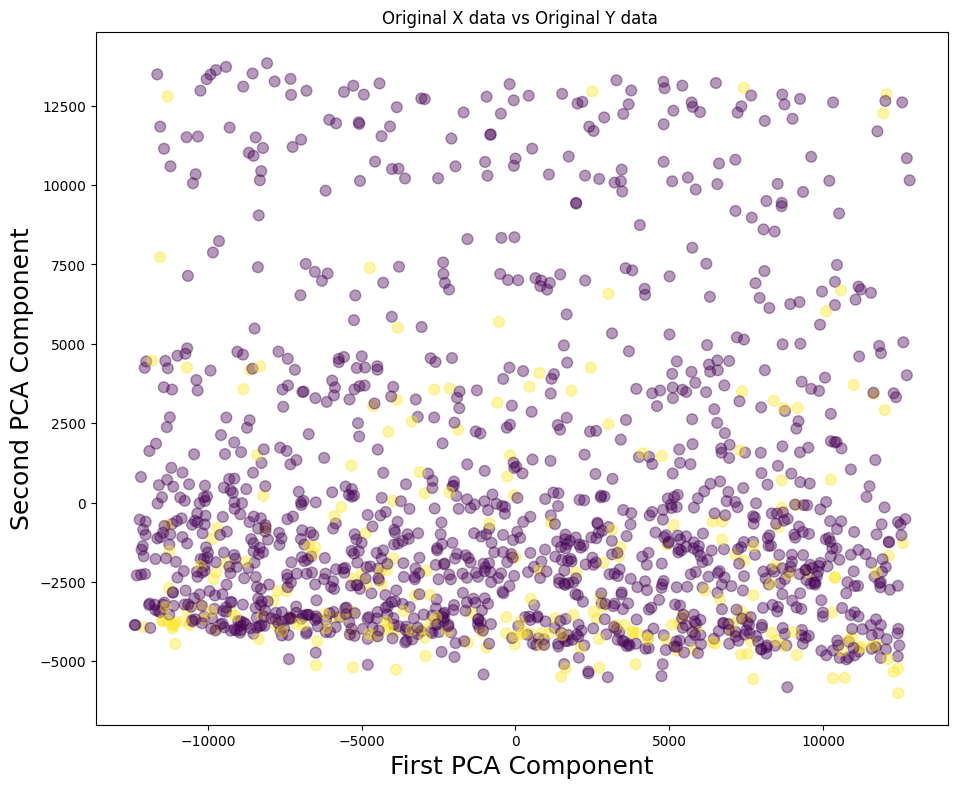

In [51]:
fig3, axs3 = plt.subplots(1,1,figsize=(11,9))
axs3.scatter(data_pca3[:,0],data_pca3[:,1],c=Y,alpha=0.4,s=60)
axs3.set_xlabel("First PCA Component",fontsize=18)
axs3.set_ylabel("Second PCA Component",fontsize=18)
axs3.title.set_text('Original X data vs Original Y data ')

In [52]:
evr3 = pca3.explained_variance_ratio_
total_evr3 = evr3.sum() * 100
print("Explained variation per principal component: {}".format(evr3))
print("Total percentage of variance captured by the first 2 components of PCA: {}".format(total_evr3))
print("Strength of each PCA components: ",pca3.singular_values_)

Explained variation per principal component: [0.69131838 0.30151649]
Total percentage of variance captured by the first 2 components of PCA: 99.28348730879566
Strength of each PCA components:  [272936.13130434 180250.93101541]
